In [1]:
import math
import warnings
warnings.filterwarnings('ignore')

from IPython.display import display
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn import ensemble
%matplotlib inline

pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
from sklearn import datasets
iris1 = datasets.load_iris()

iris = pd.DataFrame(data= np.c_[iris1['data'], iris1['target']],
                     columns= iris1['feature_names'] + ['target'])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.100,3.500,1.400,0.200,0.000
1,4.900,3.000,1.400,0.200,0.000
2,4.700,3.200,1.300,0.200,0.000
3,4.600,3.100,1.500,0.200,0.000
4,5.000,3.600,1.400,0.200,0.000


In [3]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000,150.000,150.000,150.000,150.000
mean,5.843,3.057,3.758,1.199,1.000
std,0.828,0.436,1.765,0.762,0.819
min,4.300,2.000,1.000,0.100,0.000
25%,5.100,2.800,1.600,0.300,0.000
50%,5.800,3.000,4.350,1.300,1.000
75%,6.400,3.300,5.100,1.800,2.000
max,7.900,4.400,6.900,2.500,2.000


In [4]:
iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000,-0.118,0.872,0.818,0.783
sepal width (cm),-0.118,1.000,-0.428,-0.366,-0.427
petal length (cm),0.872,-0.428,1.000,0.963,0.949
petal width (cm),0.818,-0.366,0.963,1.000,0.957
target,0.783,-0.427,0.949,0.957,1.000


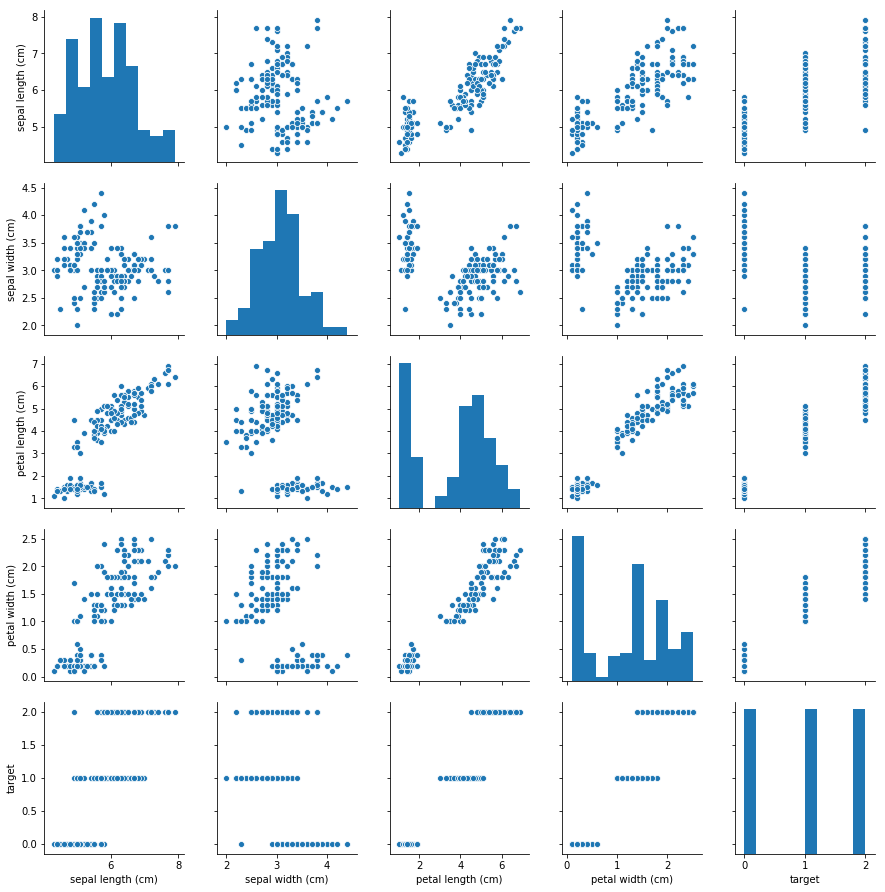

In [5]:
sns.pairplot(iris)

In [6]:
X = iris.iloc[:,:-1]
Y = iris.iloc[:,:-1]

In [7]:
# Import model
from sklearn import tree

# Help display visualizations
from IPython.display import Image

# Initialize and train tree
regressor_tree = tree.DecisionTreeRegressor(
    criterion='mse',
    max_depth=3,
    max_features=3
)

# Render tree
regressor_tree.fit(X, Y)
#export_graphviz(regressor_tree, out_file='regressor_tree.dot',feature_names=X.columns,
#   class_names=Y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=3,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

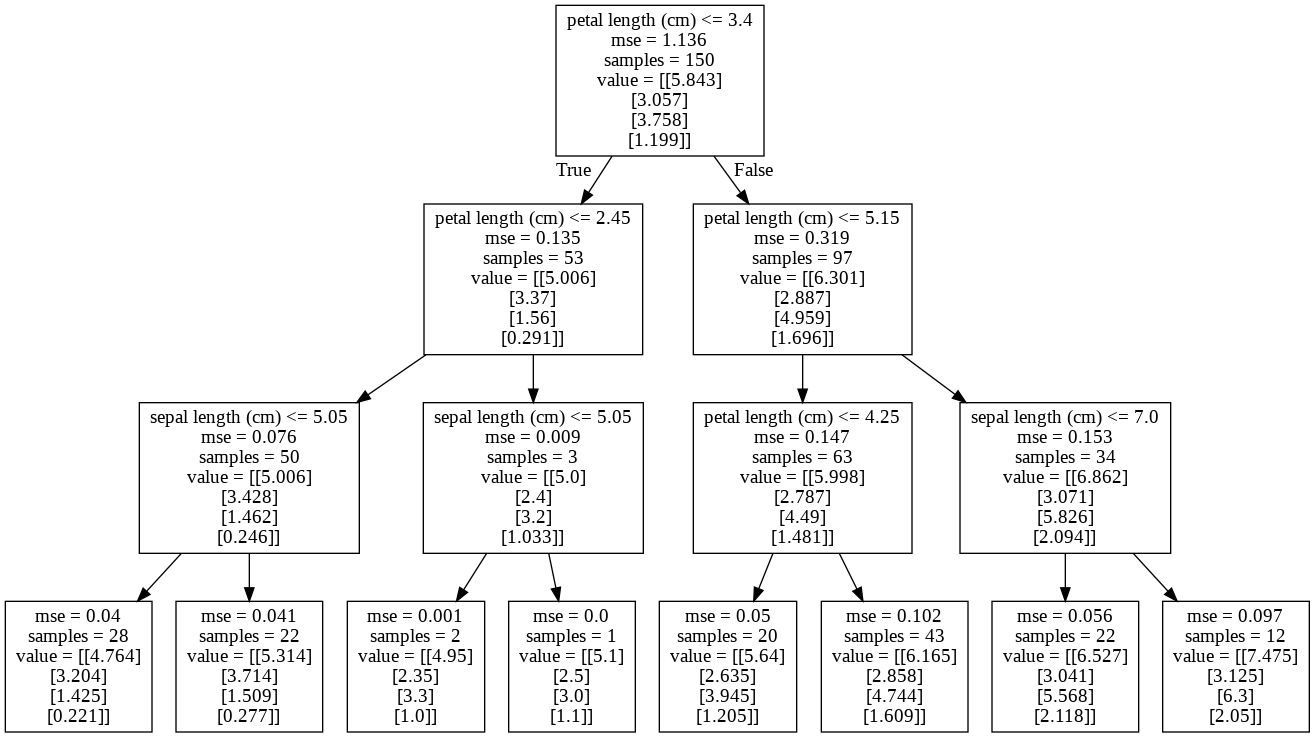

In [8]:
import pydotplus
import graphviz

dot_data = tree.export_graphviz(
    regressor_tree, out_file=None,
    feature_names=iris.columns[0:4])

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [9]:
#cross validation

tree_score = cross_val_score(regressor_tree, X, Y, cv=5)
print('CV Score:\n', tree_score)
print('\n\nMean:', tree_score.mean(), '\n\nVariance:', tree_score.std()*2)

CV Score:
 [0.2685534  0.87709799 0.25442944 0.71244323 0.33825673]


Mean: 0.49015616058960676 

Variance: 0.511377615076923


## Random Forest

In [10]:
regressor_forest = ensemble.RandomForestRegressor(
    max_depth=3,
    max_features=3
)

forest_score = cross_val_score(regressor_forest, X, Y, cv=5)
print('CV Score:\n', forest_score)
print('\n\nMean:', forest_score.mean(), '\n\nVariance:', forest_score.std()*2)

CV Score:
 [0.50387587 0.92260926 0.37552998 0.77164217 0.62220388]


Mean: 0.6391722317615868 

Variance: 0.38573058005661787


## Simplicity via Runtime

In [11]:
import time

#runtime of tree
start = time.time()

regressor_tree = tree.DecisionTreeRegressor(
    criterion = 'mse',
    max_depth = 3,
    max_features = 3
)

tree_Score = cross_val_score(regressor_tree, X, Y, cv=5)

end = time.time()
tree_time = end-start
print(tree_time)

0.036576032638549805


In [12]:
#runtime of forest
start = time.time()

regressor_forest = ensemble.RandomForestRegressor(
    max_depth = 3,
    max_features = 3
)

forest_score = cross_val_score(regressor_forest, X, Y, cv=5)

end = time.time()
forest_time = end-start
print(forest_time)

0.11143732070922852


In [13]:
print('Forest is', round(forest_time/tree_time, 2), 'times slower than the tree')

Forest is 3.05 times slower than the tree
